In [25]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, linewidth=100)

In [26]:
mba_salary_df =  pd.read_csv("MBA Salary.csv")
mba_salary_df.head()

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [27]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [28]:
import statsmodels.api as sm
X = sm.add_constant(mba_salary_df['Percentage in Grade 10'])
X.head()

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [29]:
Y = mba_salary_df['Salary']

In [30]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=100)
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((40, 2), (10, 2), (40,), (10,))

In [31]:
mba_salary_lm = sm.OLS(train_Y, train_X).fit()
mba_salary_lm.params

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64

In [32]:
# MBA Salary = 30587.285 + 3560.587 * (Percentage in Grade 10)
# y = B0 + B1*X

In [33]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2024-07-25 19:00      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 800x600 with 0 Axes>

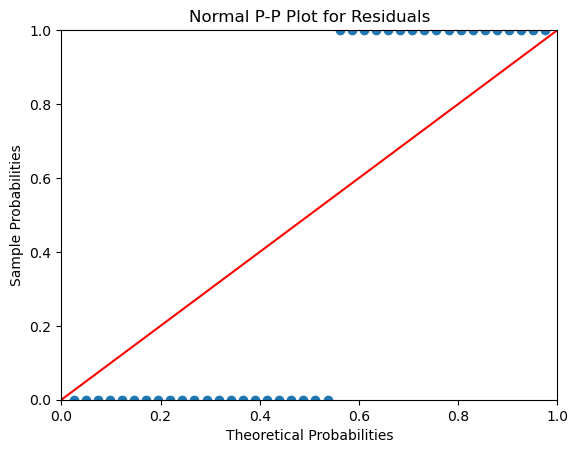

In [35]:
mba_salary_resid = mba_salary_lm.resid
probplot = sm.ProbPlot(mba_salary_resid)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title('Normal P-P Plot for Residuals')
plt.show()

In [40]:
def get_standardized_values (vals):
    return (vals - (vals.mean())/vals.std())

Text(0.5, 1.0, 'Residual Plot')

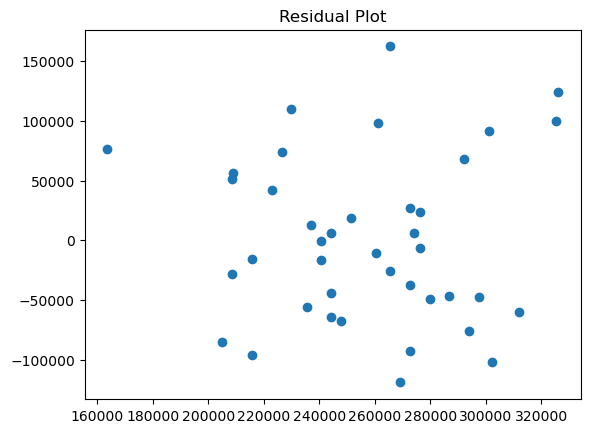

In [41]:
plt.scatter(get_standardized_values(mba_salary_lm.fittedvalues),
           get_standardized_values(mba_salary_resid))
plt.title("Residual Plot")

In [42]:
from scipy.stats import zscore

mba_salary_df['Z_Score_Salary'] = zscore(mba_salary_df['Salary'])

In [45]:
mba_salary_df[(mba_salary_df['Z_Score_Salary'] > 3) | (mba_salary_df['Z_Score_Salary'] < -3)]

,S. No.,Percentage in Grade 10,Salary,Z_Score_Salary


In [48]:
mba_influence = mba_salary_lm.get_influence()
(c,p) = mba_influence.cooks_distance

Text(0.5, 1.0, "Cook's Distance")

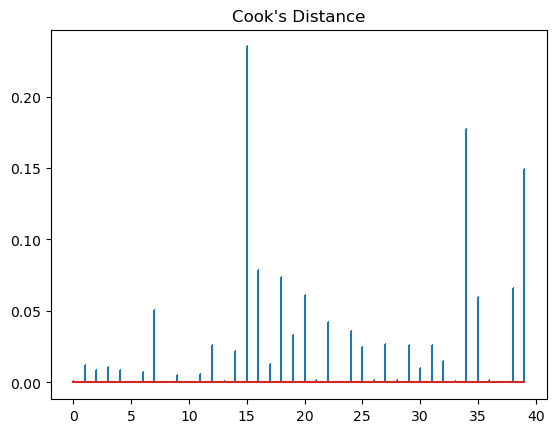

In [49]:
plt.stem(np.arange(len(train_X)), np.round(c,3), markerfmt=',')
plt.title("Cook's Distance")

Text(0.5, 1.0, 'Leverage Values')

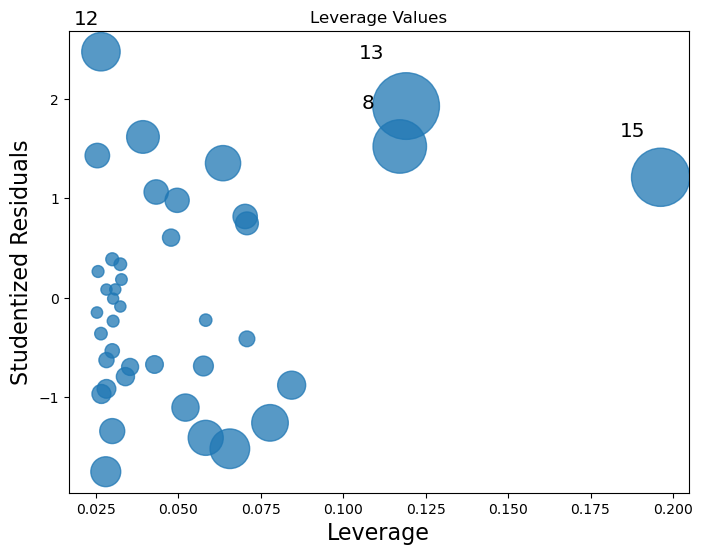

In [50]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize=(8,6))
influence_plot(mba_salary_lm, ax=ax)
plt.title("Leverage Values")

In [51]:
pred_Y = mba_salary_lm.predict(test_X)

In [52]:
from sklearn.metrics import r2_score, mean_squared_error
np.abs(r2_score(test_Y, pred_Y))

0.156645849742304

In [53]:
np.sqrt(mean_squared_error(test_Y, pred_Y))

73458.04348346895

In [56]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
pred_Y = mba_salary_lm.predict(test_X)
_, pred_Y_low, pred_Y_high = wls_prediction_std(mba_salary_lm,
                                               test_X, alpha=0.1)
pred_Y_df = pd.DataFrame({'grade_10_perc': test_X['Percentage in Grade 10'],
                         'pred_y':pred_Y,
                         'pred_Y_left': pred_Y_low,
                         'pred_Y_right': pred_Y_high})
pred_Y_df.head(10)

,grade_10_perc,pred_y,pred_Y_left,pred_Y_right
6,70.0,279828.402452,158379.831862,401276.973042
36,68.0,272707.227686,151576.714839,393837.740534
37,52.0,215737.829560,92950.942211,338524.716909
28,58.0,237101.353858,115806.869437,358395.838278
43,74.5,295851.045675,173266.083158,418436.008191
49,60.8,247070.998530,126117.560802,368024.436257
5,55.0,226419.591709,104507.444206,348331.739212
33,78.0,308313.101515,184450.060303,432176.142727
20,63.0,254904.290772,134057.999077,375750.582466
42,74.4,295494.986937,172941.528507,418048.445366
